In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
database_path = "Resources/hawaii.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{database_path}")

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
Base = automap_base()
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Map Measurement and Station tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
Measurement

sqlalchemy.ext.automap.measurement

In [8]:
Station

sqlalchemy.ext.automap.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute("SELECT * FROM Station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
engine.execute("SELECT * FROM Measurement ORDER BY date DESC").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

# Exploratory Climate Analysis

In [12]:
# Import datetime module
import datetime as dt

In [13]:
# inspector = inspect(engine)
# inspector.get_table_names()

In [14]:
# today = dt.date.today()
# today
# today_minus_12_months = today - dt.datetime

In [15]:
# Find total dates
session.query(Measurement.date).order_by(Measurement.date.desc()).all()

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [16]:
# Find earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [17]:
# Find latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [18]:
# Save latest date into a variable and in string type
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
type(latest_date)

str

In [19]:
print(latest_date)

2017-08-23


In [20]:
date_time_obj = dt.datetime.strptime(latest_date, '%Y-%m-%d') # %H:%M:%S.%f
date_time_obj.year

2017

In [21]:
one_year_back = date_time_obj.year - 1
one_year_back

2016

In [22]:
# Reconstruct the date 12 months back from the latest available date
latest_twelve_months_date = dt.date(one_year_back, date_time_obj.month, date_time_obj.day)
latest_twelve_months_date

datetime.date(2016, 8, 23)

In [23]:
# Check if the dates are sorted
sorted_desc = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
sorted_desc 

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [24]:
# Design a query to retrieve the last 12 months of precipitation data
session.query(Measurement.date).filter(Measurement.date > latest_twelve_months_date).\
                                filter(Measurement.date < latest_date).\
                                all()

[('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-02'),
 ('2016-09-03'),
 ('2016-09-04'),
 ('2016-09-05'),
 ('2016-09-06'),
 ('2016-09-07'),
 ('2016-09-08'),
 ('2016-09-09'),
 ('2016-09-10'),
 ('2016-09-11'),
 ('2016-09-12'),
 ('2016-09-13'),
 ('2016-09-14'),
 ('2016-09-15'),
 ('2016-09-16'),
 ('2016-09-17'),
 ('2016-09-18'),
 ('2016-09-19'),
 ('2016-09-20'),
 ('2016-09-21'),
 ('2016-09-22'),
 ('2016-09-23'),
 ('2016-09-24'),
 ('2016-09-25'),
 ('2016-09-26'),
 ('2016-09-27'),
 ('2016-09-28'),
 ('2016-09-29'),
 ('2016-09-30'),
 ('2016-10-01'),
 ('2016-10-02'),
 ('2016-10-03'),
 ('2016-10-04'),
 ('2016-10-05'),
 ('2016-10-06'),
 ('2016-10-07'),
 ('2016-10-08'),
 ('2016-10-09'),
 ('2016-10-10'),
 ('2016-10-11'),
 ('2016-10-12'),
 ('2016-10-13'),
 ('2016-10-14'),
 ('2016-10-15'),
 ('2016-10-16'),
 ('2016-10-17'),
 ('2016-10-18'),
 ('2016-10-19'),
 ('2016-10-20'),
 ('2016-10-21'

In [25]:
# Check which columns does the Measurement table has
# Try with inspect module
from sqlalchemy import inspect

In [26]:
inst = inspect(Measurement)
inst

<Mapper at 0x7ff37b5e47c0; measurement>

In [27]:
# Get columns' names from Measurement table
attr_names = [c_attr.key for c_attr in inst.mapper.column_attrs]
attr_names

['id', 'station', 'date', 'prcp', 'tobs']

In [28]:
# Try getting columns with reflect module
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Meas = Base.classes.measurement
Sta = Base.classes.station

In [29]:
# Use the session to query Meas table and display the first 5 entries
for row in session.query(Meas.id, Meas.station, Meas.date, Meas.prcp, Meas.tobs).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.date <= latest_date).\
    limit(5).all():
    print(row)

(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)


In [30]:
# Check count before and after filtering precipitation 'None'
prcp_list = []
date_list = []
for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all():
    prcp_list.append(row[1])
    date_list.append(row[0])
    #print(f"Date: {row[0]}, precipitation {row[1]}")
len(prcp_list)
print(f"There are {len(prcp_list)} entries including precipitation 'None' values.")    

There are 2015 entries including precipitation 'None' values.


In [31]:
# Check count before and after filtering precipitation 'None'
prcp_list_withNone = []
date_list_withNone = []
for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    all():
    prcp_list_withNone.append(row[1])
    date_list_withNone.append(row[0])
    #print(f"Date: {row[0]}, precipitation {row[1]}")
len(prcp_list_withNone)
print(f"There are total of {len(prcp_list_withNone)} entries with provided filters.")   

There are total of 2223 entries with provided filters.


In [32]:
difference = len(prcp_list_withNone) - len(prcp_list)
print(f"There are {difference} entries without precipitation data.")

There are 208 entries without precipitation data.


In [33]:
# Create a data frame with Date and Precipitation columns

In [34]:
# Convert date list into datetime format for easier handling of plotting
date_list_datetime = pd.to_datetime(date_list)
date_list_datetime

DatetimeIndex(['2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23',
               '2017-08-22', '2017-08-22', '2017-08-22', '2017-08-21',
               '2017-08-21', '2017-08-21',
               ...
               '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25',
               '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24',
               '2016-08-24', '2016-08-24'],
              dtype='datetime64[ns]', length=2015, freq=None)

In [35]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
prcp = [row[1] for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()]
date = [row[0] for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()]

In [36]:
# Create Precipitation dataframe to explore plotting options easier
prcp_df = pd.DataFrame({'Date': date, 'Precipitation': prcp})
prcp_df.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [37]:
# Convert date list to datetime format
prcp_df['Date'] = pd.to_datetime(prcp_df['Date'])
prcp_df

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2010,2016-08-24,2.15
2011,2016-08-24,2.28
2012,2016-08-24,1.22
2013,2016-08-24,2.15


In [38]:
type(prcp_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

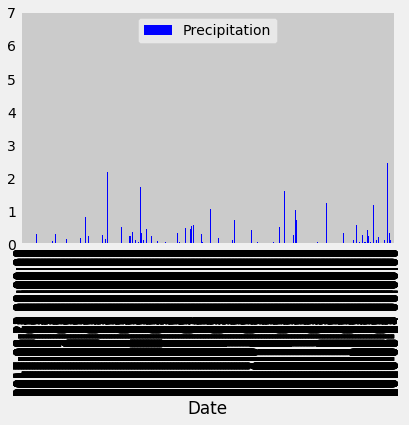

In [39]:
# Plot data frame
prcp_df.plot(kind='bar', x='Date', y='Precipitation', color='Blue', rot=90)

# plt.set_xticklabels(prcp_df.Date,rotation=90)
plt.show()

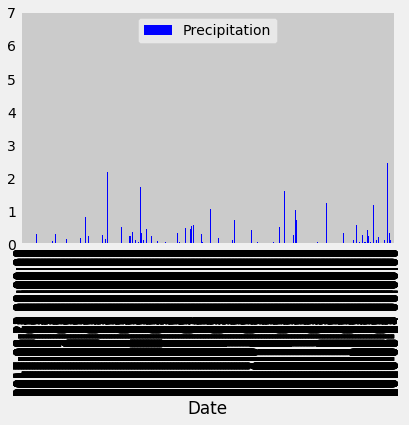

In [40]:
# Plot data frame
prcp_df.plot(kind='bar', x='Date', y='Precipitation', color='Blue')
plt.show()

In [41]:
# # Plot precipitation data using subplots
# fig, ax = plt.subplots()
# ypos = range(prcp)
# ax.bar(ypos, date[:])
# plt.show()

In [42]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
# Note: try to use average of group by date, to reduce the data for plotting
session.query(Meas.date, Meas.prcp).group_by(Meas.date).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()

[('2017-08-23', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-15', 0.02),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-04', 0.02),
 ('2017-08-03', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-01', 0.02),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-25', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-23', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-20', 0.03),
 ('2017-07-19', 0.0),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.03),
 ('2017-07-16', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-14', 0.02),
 ('2017-07-13', 0.07),
 ('2017-07-12', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-10', 0.0),

In [43]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
# Note: try to use average of group by date, to reduce the data for plotting
# Check which precipitation value without group_by
session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()
print("The first entry's precipitation value is used, when apply group_by date.")
# grouped_date = [row[0] for row in session.query(Meas.date, Meas.prcp).\
#     order_by(Measurement.date.desc()).\
#     filter(Meas.date <= latest_date).\
#     filter(Meas.date > latest_twelve_months_date).\
#     filter(Meas.prcp != 'None').\
#     all()]
# print(f"There are {len(grouped_date)} entries when group by date, as expected for the latest 12 months.")

The first entry's precipitation value is used, when apply group_by date.


In [44]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
# Note: try to use first value of group by date, to reduce the data for plotting
grouped = session.query(Meas.date, Meas.prcp).group_by(Meas.date).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()
grouped

[('2017-08-23', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-15', 0.02),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-04', 0.02),
 ('2017-08-03', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-01', 0.02),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-25', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-23', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-20', 0.03),
 ('2017-07-19', 0.0),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.03),
 ('2017-07-16', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-14', 0.02),
 ('2017-07-13', 0.07),
 ('2017-07-12', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-10', 0.0),

In [45]:
# # Note: try to use first value of group by date, to reduce the data for plotting
# func_avg = grouped.count()
# func_avg
# # grouped_prcp = [row[1] for row in session.query(Meas.date, Meas.prcp).group_by(Meas.date).\
# #     order_by(Measurement.date.desc()).\
# #     filter(Meas.date <= latest_date).\
# #     filter(Meas.date > latest_twelve_months_date).\
# #     filter(Meas.prcp != 'None').\
# #     all()]
# # grouped_date = [row[0] for row in session.query(Meas.date, Meas.prcp).group_by(Meas.date).\
# #     order_by(Measurement.date.desc()).\
# #     filter(Meas.date <= latest_date).\
# #     filter(Meas.date > latest_twelve_months_date).\
# #     filter(Meas.prcp != 'None').\
# #     all()]
# # print(f"There are {len(grouped_date)} entries when group by date, as expected for the latest 12 months.")

In [46]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
# Note: try to use average of group by date, to reduce the data for plotting
# Note: get average precipitation after grouping by date
grouped_prcp = [row[1] for row in session.query(Meas.date, Meas.prcp).group_by(Meas.date).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()]
grouped_date = [row[0] for row in session.query(Meas.date, Meas.prcp).group_by(Meas.date).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()]
print(f"There are {len(grouped_date)} entries when group by date, as expected for the latest 12 months.")

There are 365 entries when group by date, as expected for the latest 12 months.


In [47]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
# Note: try to use average of group by date, to reduce the data for plotting
# Compare with the results without group_by
session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-

In [48]:
#  PLOT the results
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2015 non-null   datetime64[ns]
 1   Precipitation  2015 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.6 KB


In [49]:
# #b = pd.read_csv('b.dat')
# #b.index = pd.to_datetime(b['date'],format='%m/%d/%y %I:%M%p')
# prcp_df.groupby(by=[prcp_df.Date.month, prcp_df.Date.year])

In [50]:
print(prcp_df['Date'])

0      2017-08-23
1      2017-08-23
2      2017-08-23
3      2017-08-23
4      2017-08-22
          ...    
2010   2016-08-24
2011   2016-08-24
2012   2016-08-24
2013   2016-08-24
2014   2016-08-24
Name: Date, Length: 2015, dtype: datetime64[ns]


In [51]:
prcp_df['Date']

0      2017-08-23
1      2017-08-23
2      2017-08-23
3      2017-08-23
4      2017-08-22
          ...    
2010   2016-08-24
2011   2016-08-24
2012   2016-08-24
2013   2016-08-24
2014   2016-08-24
Name: Date, Length: 2015, dtype: datetime64[ns]

In [52]:
# prcp_df['date_minus_time'] = prcp_df["Date"].apply( lambda prcp_df : 
# dt.datetime(year=prcp_df.year, month=prcp_df.month, day=prcp_df.day))
# prcp_df.set_index(prcp_df["date_minus_time"]) # ,inplace=True
# prcp_df = prcp_df.drop(columns='date_minus_time')
# prcp_df.head()

In [53]:
# Use resample method on the Date column to sum grouped by date p
prcp_df.set_index('Date').resample('D')["Precipitation"].sum()

Date
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
2016-08-28    3.10
              ... 
2017-08-19    0.09
2017-08-20    0.01
2017-08-21    0.58
2017-08-22    0.50
2017-08-23    0.53
Freq: D, Name: Precipitation, Length: 365, dtype: float64

In [54]:
# Use resample method on the Date column to sum grouped by date p
prcp_df.set_index('Date').resample('M')["Precipitation"].sum()

Date
2016-08-31    18.10
2016-09-30    49.40
2016-10-31    21.77
2016-11-30    20.56
2016-12-31    35.51
2017-01-31    11.95
2017-02-28    39.06
2017-03-31    29.62
2017-04-30    54.91
2017-05-31    25.27
2017-06-30    20.52
2017-07-31    23.72
2017-08-31     5.18
Freq: M, Name: Precipitation, dtype: float64

In [55]:
# Set Date column as index in the dataframe
prcp_sampled_df = prcp_df.set_index('Date')
prcp_sampled_df

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22


In [56]:
prcp_monthly_total = prcp_sampled_df.resample('M')["Precipitation"].sum()
type(prcp_monthly_total)

pandas.core.series.Series

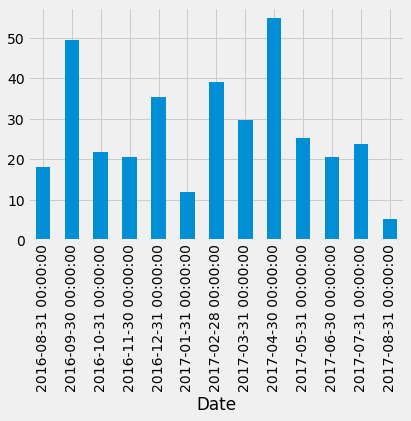

In [57]:
index = []
ax = prcp_monthly_total.plot.bar(rot=90)

In [58]:
df_reset_index = prcp_monthly_total.reset_index()
df_reset_index.head()

,Date,Precipitation
0,2016-08-31,18.10
1,2016-09-30,49.40
2,2016-10-31,21.77
3,2016-11-30,20.56
4,2016-12-31,35.51


In [59]:
# Convert datetime 'Date' column back to string to change format
df_reset_index['Date (str)'] = df_reset_index['Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
df_reset_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           13 non-null     datetime64[ns]
 1   Precipitation  13 non-null     float64       
 2   Date (str)     13 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 440.0+ bytes


In [60]:
# stringdate = df_reset_index['Date (str)']
# stringdate_formatted = stringdate.strftime('%Y, %B %d')

In [61]:
stringdate1 = df_reset_index['Date']
stringdate_formatted = stringdate1.dt.strftime('%Y, %b %d')
stringdate_formatted

0     2016, Aug 31
1     2016, Sep 30
2     2016, Oct 31
3     2016, Nov 30
4     2016, Dec 31
5     2017, Jan 31
6     2017, Feb 28
7     2017, Mar 31
8     2017, Apr 30
9     2017, May 31
10    2017, Jun 30
11    2017, Jul 31
12    2017, Aug 31
Name: Date, dtype: object

In [62]:
# df_reset_index["Date (yyyy-MM-dd)"] = df_reset_index

In [63]:
# dates = df_reset_index['Date (str)']
# dates = date.strftime("%Y-%M-%d")

In [64]:
# # Use pendulum to format date
# import pendulum
# pendulum.now().to_formatted_date_string()
# dates = df_reset_index['Date (str)']
# type(dates)
# pendulum.dates.to_formatted_date_string()

In [65]:
# t = dt.time(1, 2, 3)
# print(t)
# print('hour  :', t.hour)
# print('minute:', t.minute)
# print('second:', t.second)
# print('microsecond:', t.microsecond)
# print('tzinfo:', t.tzinfo)

In [66]:
# t = dt.date(1, 2, 3)
# print(t)
# print('year  :', t.year)
# print('month:', t.month)
# print('day:', t.day)

In [67]:
# latest_date_year = latest_date.year

In [68]:
# # Import func and text methods from sqlalchemy to work with dates
# from sqlalchemy import func, text

In [69]:
# from datetime import datetime, timedelta

In [70]:
# delta = timedelta(microseconds=-1)
# delta

In [71]:
# twelve_months_earlier = latest_date - dt.timedelta(days=365)

In [72]:
# last_twelve_months = latest_date - dt.date.today()
# last_twelve_months

In [73]:
# results = session.query(Measurement.high_price - Dow.low_price).\
#     filter(Dow.date > date).filter(Dow.stock == 'IBM').all()


In [74]:
# .\
#                 filter(Measurement.date > dt.date.today().\
#                 filter(Measurement.date < dt.date.today))

In [75]:
# last_365_days = dt.date.today() - dt.timedelta(days=365)
# last_365_days

In [76]:
# last_12_months = dt.date.today() - dt.timedelta(months=12)
# last_12_months

In [77]:
# week_ago = dt.date.today() - dt.timedelta(days=7)
# week_ago

In [78]:
# Measurement.date

In [79]:
# print(dt.date.today())

In [80]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [82]:
# Design a query to show how many stations are available in this dataset?


In [83]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [84]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [86]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [87]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [88]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [89]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [90]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [91]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [92]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [93]:
# Plot the daily normals as an area plot with `stacked=False`
